# Imports

In [1]:
import keras #High level interface of TensorFlow
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import InputLayer
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.layers.convolutional import *
import numpy as np 
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from PIL import Image

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Image preprocessing

In [2]:
train_path='../dataset2/train'
valid_path='../dataset2/valid'

In [4]:
batch_size = 16 #Every batch contains data from 16 different images 
#Data Augmentation
train_datagen = ImageDataGenerator( 
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(400, 400),  
        batch_size=batch_size,)  
valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(400, 400),  
        batch_size=batch_size,)  


Found 899 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


# Creating a model

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(400, 400, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #first block, frozen

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #second block, frozen

model.add(Flatten()) #Stream data to "nodes" of the ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #Dropping out some data
model.add(Dense(8))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
__________

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
model.save("pure_model.h5")

# Training

In [7]:
model.fit_generator(train_set,
                    steps_per_epoch = 899//batch_size, #1000/16 numbers of batches per epoch
                    epochs = 30,
                    validation_data = valid_set,
                    validation_steps = 320//16 )
                   
        
                 

Epoch 1/30
56/56 [==============================] - 272s 5s/step - loss: 0.4710 - acc: 0.8346 - val_loss: 0.4029 - val_acc: 0.8750
Epoch 2/30
56/56 [==============================] - 271s 5s/step - loss: 0.3758 - acc: 0.8691 - val_loss: 0.4225 - val_acc: 0.8555
Epoch 3/30
56/56 [==============================] - 277s 5s/step - loss: 0.3279 - acc: 0.8881 - val_loss: 0.3810 - val_acc: 0.8617
Epoch 4/30
56/56 [==============================] - 279s 5s/step - loss: 0.2886 - acc: 0.9023 - val_loss: 0.3398 - val_acc: 0.8781
Epoch 5/30
56/56 [==============================] - 279s 5s/step - loss: 0.2622 - acc: 0.9084 - val_loss: 0.3331 - val_acc: 0.8770
Epoch 6/30
56/56 [==============================] - 279s 5s/step - loss: 0.2507 - acc: 0.9151 - val_loss: 0.3314 - val_acc: 0.8781
Epoch 7/30
56/56 [==============================] - 290s 5s/step - loss: 0.2216 - acc: 0.9213 - val_loss: 0.2933 - val_acc: 0.8965
Epoch 8/30
56/56 [==============================] - 305s 5s/step - loss: 0.2142 - a

In [8]:
model.save("Model/model_400x400.h5")
tfjs.converters.save_keras_model(model, './Model/model_js_400x400/model.json')
print("Saved")

Saved


# Testing

In [9]:
valid_set.class_indices

{'Faces': 0,
 'butterfly': 1,
 'cougar_body': 2,
 'cougar_face': 3,
 'crab': 4,
 'crayfish': 5,
 'crocodile': 6,
 'soccer_ball': 7}

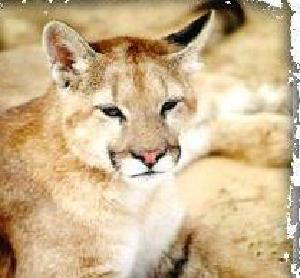

In [14]:
image = Image.open("PersonalTestSet/image_000.jpg")
image

In [15]:
def preprocess_img(img,target_size):
    img = img.resize(target_size)
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    return img

In [16]:
preprocessed_image = preprocess_img(image,target_size=(400,400))

In [17]:
predictions = model.predict(preprocessed_image)
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.4571485e-33,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)